Тема: Влияние каналов продаж, новостных рассылок и купонов на число продаж на одного покупателе в выбранном Онлайн-магазине. 

Поскольку мне интересен рынок онлайн ретейла, и я планирую создавать бренд эко-френдли одежды, мне было бы полезно проанализироать данные именно по онлайн магазину. Наиболее интересным показателем зачастую оказывается Av. Payment Count or LifeTime - число покупок на 1-го платящего (в выбранных данных это N-Purchases), так как при создании финмодели именно он играет большую роль (чаще издержки наибольшие для привлечения именно пользователя) и повышение числа покупок на платящего позволит вывести модель в плюс. 

Число покупок, которое покупатель совершит, в свою очередь, может зависить от различных факторов, например, продвижение в определенном браузере, эффективности рассылки или выданные купоны на скидку, их в данных будут отражать данные в колонках Browser, Newsletter, Voucher. 

Сделавв EDA, можно будет увидеть существование закономерностей между числом покупок одного покупателя и вышеописанными признаками, которые по предположению влияют на это. На 5-м шаге проекта определю, совершается ли наибольшее количество покупок в выходные дни/праздники. На 6-м шаге поставлю гипотезы о математическом ожидании покупок одного покупателя, а на 7 попробую предсказать.

Данные возьму с портала Kaggle: https://www.kaggle.com/datasets/onlineretailshop/online-shop-customer-sales-data

Customer_id = unique customer id

Age = customer's age

Gender = 0: Male, 1: Female

Revenue_Total = total sales by customer

N_Purchases = number of purchases

Purchase_DATE = date latest purchase, dd.mm.yy

Purchase_VALUE = latest purchase in €

Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

Time_Spent = time spent (in sec) on website

Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other

Newsletter = 0: not subscribed, 1: subscribed

Voucher = 0: not used, 1: used

Приступим к описанию данных, посмотрим, что в них содержится

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('Online_Shop _Customer_Sales_Data.csv')

In [5]:
df.shape

(65796, 12)

In [6]:
df['Customer_id'].nunique()

65796

In [7]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [8]:
df.isnull().sum() #удивительно, но в данных нет пропусков...

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [9]:
df.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

In [10]:
df.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [12]:
df['N_Purchases'].value_counts()

1    9519
2    9427
3    9426
7    9418
5    9408
6    9340
4    9258
Name: N_Purchases, dtype: int64

In [13]:
df['Browser'].value_counts()

0    42076
1    13135
3     7208
2     3377
Name: Browser, dtype: int64

In [17]:
df.groupby(['Browser', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Browser,N_Purchases,Customer_id
0,0,1,6158
1,0,2,6022
2,0,3,6038
3,0,4,5985
4,0,5,5920
5,0,6,5995
6,0,7,5958
7,1,1,1896
8,1,2,1887
9,1,3,1884


В каждом из браузеров примерное равное количество Customer_id приходится на разное количество покупок, хочется сделать вывод, что распределение браузеров в разре N_Purchases равномерное

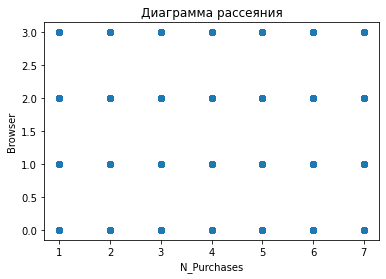

In [20]:
plt.scatter(df['N_Purchases'], df['Browser'])
plt.xlabel('N_Purchases')
plt.ylabel('Browser')
plt.title('Диаграмма рассеяния')
plt.show()

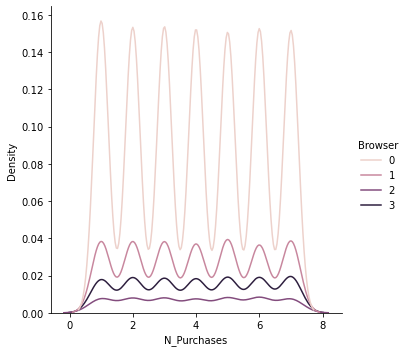

In [21]:
import matplotlib.pyplot as plt
sns.displot(data=df, x='N_Purchases', hue='Browser', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Density')
plt.show()

In [23]:
df['Newsletter'].value_counts()

0    55859
1     9937
Name: Newsletter, dtype: int64

In [24]:
df.groupby(['Newsletter', 'N_Purchases'], as_index=False)['Customer_id'].count() 

,Newsletter,N_Purchases,Customer_id
0,0,1,8096
1,0,2,7972
2,0,3,7989
3,0,4,7875
4,0,5,7979
5,0,6,7947
6,0,7,8001
7,1,1,1423
8,1,2,1455
9,1,3,1437


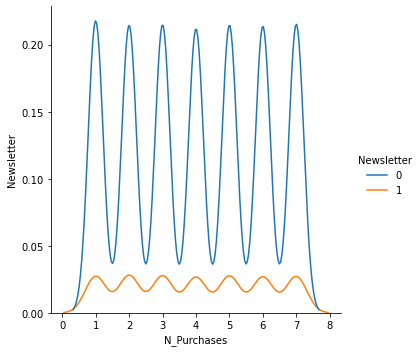

In [25]:
sns.displot(data=df, x='N_Purchases', hue='Newsletter', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Newsletter')
plt.show()

In [26]:
df['Voucher'].value_counts()

0    49330
1    16466
Name: Voucher, dtype: int64

In [27]:
df.groupby(['Voucher', 'N_Purchases'], as_index=False)['Customer_id'].count()

,Voucher,N_Purchases,Customer_id
0,0,1,7099
1,0,2,7033
2,0,3,7090
3,0,4,6958
4,0,5,7073
5,0,6,6966
6,0,7,7111
7,1,1,2420
8,1,2,2394
9,1,3,2336


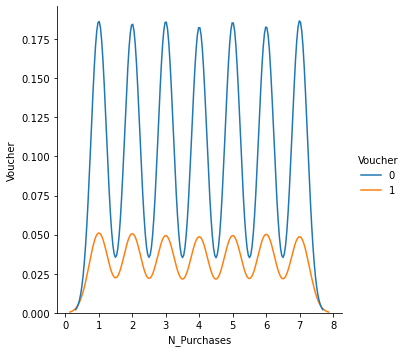

In [28]:
sns.displot(data=df, x='N_Purchases', hue='Voucher', kind='kde')
plt.xlabel('N_Purchases')
plt.ylabel('Voucher')
plt.show()

У трёх факторов, рассмотренных выше (Newsletter, Browser, Voucher) распределение в разрезе N_Purchases равномерное, это говорит о том, что вряд ли возможно сделать вывод о влиянии/эффективности новостной рассылки, выбранного браузера или наличия ваучера. 

Поэтому предположение о том, что рассылка/ваучер/браузер способствует увеличению  числа покупок, не одтверждается. 

Получаются слишком красивые распределения и складывается ощущение, что данные синтетические. Поэтому я проведу анализ, выполню все действия, с намерением на то, что полученные навыки анализа данных онлайн-магазина пригодятся в дальнейшем при работе с моим брендом, а опираться на связи полученные в результате этого проекта в жизни будет опрометчиво, с

Тогда попробуем проанализировать следующее: влияние дня недели на активность покупателей, измерим это с помощьюсоздания нового признака на основе даты (поймем, какая покупка пределенным покупателем с его id в какой неделе совершалась) и далее проведем анализ связи между днем недели и числом покупок (N_Purchases) или выручкой с покупки (Revenue_Total).